# Tampa Real-Estate Recommender
## Exploratory Data Analysis
TB Real Estate Corporation is a real estate investment firm in the Tampa Bay, Florida area.  The real estate market in the Tampa Bay area is very active.  Single family homes are selling quickly.  TB Real Estate Corporation needs to be able to assess the value of homes coming onto the market quickly and accurately so that they can beat the competition in making a competitive offer.   They need to be able to evaluate the listing price against the predicted sale price in order to identify properties that may be priced below market value and would make good investments.  
<br>
The objective of the EDA is to identify which features are the best predictors of sales price for residential properties.

# 1 Imports and File Locations<a id='1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# suppress future warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [3]:
ext_data = '../data/external/'
raw_data = '../data/raw/'
interim_data = '../data/interim/'
report_figures = '../reports/figures/'

# 2 Read Sales data into dataframe<a id='2'></a>

In [4]:
df = pd.read_csv(interim_data + 'sales_df.csv')
df.head()

C:\Users\mkars\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26,27,28,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,FOLIO,DOR_CODE,S_DATE,VI,QU,REA_CD,S_AMT,S_TYPE,ORIG_SALES_DATE,SITE_ADDR,...,BASE,ACREAGE,NBHC,MUNICIPALITY_CD,SECTION_CD,TOWNSHIP_CD,RANGE_CD,LAND_TYPE_ID,BLOCK_NUM,LOT_NUM
0,80100,100,1987-08-01,I,Q,01,50000.0,WD,1985-11-01,19859 ANGEL LN,...,2016,5.058780,211007.0,U,1,27,17,001,000000,00001.1
1,80100,100,1985-11-01,V,Q,01,24000.0,WD,1985-11-01,19859 ANGEL LN,...,2016,5.058780,211007.0,U,1,27,17,001,000000,00001.1
2,90100,100,2021-10-27,I,Q,01,750000.0,WD,1973-01-01,19913 ANGEL LN,...,1973,4.438490,211007.0,U,1,27,17,001,000000,00002.1
3,90100,100,1997-05-01,I,Q,01,169900.0,WD,1973-01-01,19913 ANGEL LN,...,1973,4.438490,211007.0,U,1,27,17,001,000000,00002.1
4,100000,100,1988-06-01,I,Q,01,52500.0,WD,1977-12-01,6934 W COUNTY LINE RD,...,1994,0.992559,211007.0,U,1,27,17,001,000000,00003.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847102 entries, 0 to 847101
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FOLIO            847102 non-null  int64  
 1   DOR_CODE         847102 non-null  int64  
 2   S_DATE           847102 non-null  object 
 3   VI               847102 non-null  object 
 4   QU               847102 non-null  object 
 5   REA_CD           847102 non-null  object 
 6   S_AMT            847102 non-null  float64
 7   S_TYPE           847102 non-null  object 
 8   ORIG_SALES_DATE  847102 non-null  object 
 9   SITE_ADDR        847013 non-null  object 
 10  SITE_CITY        847095 non-null  object 
 11  SITE_ZIP         847102 non-null  object 
 12  tBEDS            847102 non-null  float64
 13  tBATHS           847102 non-null  float64
 14  tSTORIES         847102 non-null  float64
 15  tUNITS           847102 non-null  float64
 16  tBLDGS           847102 non-null  floa

# 3 Target Feature - Sales Price (S_AMT)<a id='3'></a>

**S_AMT** is the sale price of the property.  This will be the target feature to predict.  The current sales data includes all residential property sales in Hillsborough County Florida from 1980 through 2022.  The sale amounts range from \\$1100 to over \\$26mm with a mean of \\$200k and a median of \\$142k.
<br>
TB Real Estate Corp is interested in certain property features that are favorable to most residential home buyers.  The following categories will be reviewed.
- Types of Sales
- Home Features
- Property Locations
- Taxable Values of Properties

In [6]:
print(df['S_AMT'].describe().apply(lambda x: format(x, 'f')))

count      847102.000000
mean       198455.618730
std        393473.738058
min          1100.000000
25%         76600.000000
50%        142000.000000
75%        235000.000000
max      26433000.000000
Name: S_AMT, dtype: object


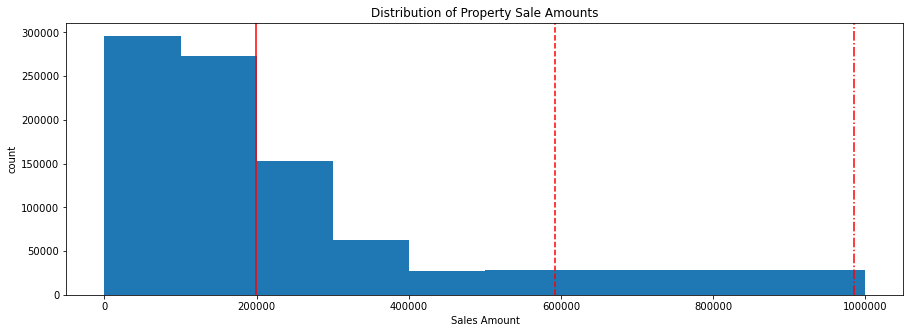

In [7]:
S_AMT_mean = df['S_AMT'].mean()
S_AMT_std = df['S_AMT'].std()
_ = plt.subplots(figsize=(15, 5))
_ = plt.hist(data=df, x='S_AMT', bins=[0, 100000, 200000, 300000, 400000, 500000, 1000000])
_ = plt.xlabel('Sales Amount')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Property Sale Amounts')
_ = plt.ticklabel_format(useOffset=False, style='plain')
_ = plt.axvline(S_AMT_mean, color='r')
_ = plt.axvline(S_AMT_mean+S_AMT_std, color='r', linestyle='--')
_ = plt.axvline(S_AMT_mean+(2*S_AMT_std), color='r', linestyle='-.')

# 4 Types of Sales<a id='4'></a>
### TB Real Estate is only interested in analyzing recent, qualified sales of improved single family residential homes.

**Qualified Sales (QU)** are free market, single parcel, non-barter sales.  Unqualified sales that are multi-parcel, barter/trade, title transfer, etc. sales which would not represent market value.  Unqualified sales were already filtered out of the data during the data wrangling process.  Therefore, the QU, Reason Code (REA_CD), and Sale Type (S_TYPE) columns can be dropped.

In [8]:
print(df['QU'].describe())
df.drop(['QU', 'REA_CD', 'S_TYPE'], axis=1, inplace=True)

count     847102
unique         1
top            Q
freq      847102
Name: QU, dtype: object


**Improved** property sales indicate that the property includes a structure (house).  Vacant property sales would only include the land.  Since TB Real Estate Corp is only interested in improved properties, the vacant property sales will be dropped.

In [9]:
print(df['VI'].value_counts())
df = df[df['VI'] == 'I']
df.drop('VI', axis=1, inplace=True)

I    799492
V     47610
Name: VI, dtype: int64


**Single Family Residental** homes are represented by a **DOR Code** of 100. DOR Code is the Department of Revenue Code which indicates the type of property (i.e. single family home, condo, commercial, etc.)  The data has already been filtered for the following residential property types.
- 0100: Single Family Residential
- 0102: Single family home built around a mobile home
- 0106: Townhouse/Villa
- 0200: Mobile Home
- 0400: Condominium
- 0408: Mobile Home Condominium
- 0800: Multi-Family Residential (Duplex, Triplex, Quadplex, etc.) < 10 units
- 0801: Multi-Family Residential (units individually owned)
- 0802: Multi-Family Residential (units rentals)

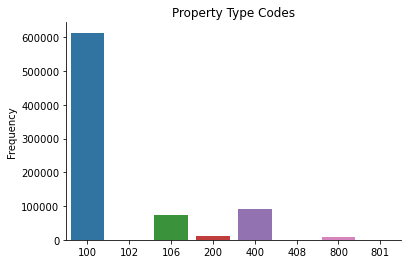

In [10]:
sns.countplot(data=df, x='DOR_CODE')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Property Type Codes')
sns.despine()
plt.show()

Most of the property sales are Single Family Residential (code 100).  Condominiums (400) and Townhouses (106) are the next highest categories, but they are just a small fraction of the total sales.  
<br>
TB Real Estate Corp will focus on Single Family Residential homes as Condominiums and Townhouses have more investment complications such as association fees and rules restricting sales and rentals.

In [11]:
df = df[df['DOR_CODE'] == 100]
df.drop('DOR_CODE', axis=1, inplace=True)

**Recent Property Sales** can be identified with the **Sales Date (S_DATE)**.  Property sales increased sharply from the mid-1990's to the mid-2000's when the U.S. mortgage crisis crashed the housing market.  Over the 2010's the annual number of property sales increased to near the levels prior to the crash.  

In [12]:
df['S_DATE'] = pd.to_datetime(df['S_DATE'])

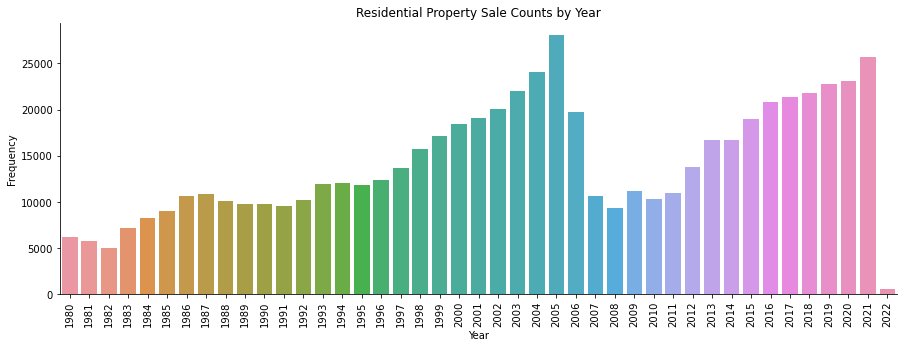

In [13]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=df['S_DATE'].dt.year)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Year')
sns.despine()
plt.show()

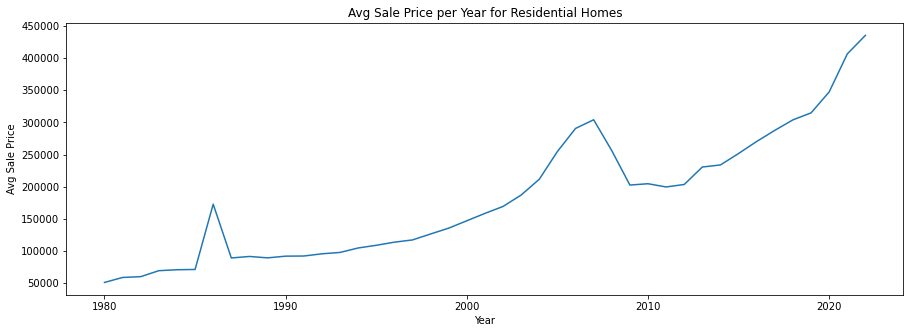

In [14]:
plt.subplots(figsize=(15, 5))
df.groupby(df['S_DATE'].dt.year)['S_AMT'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price per Year for Residential Homes')
plt.show()

Sales data prior to 2021 is excluded as market conditions such as the mid-2000's real-estate crisis can influence price.  In order to predict current market values, we will focus on the most current year of sales data.

In [15]:
# df = df[df['S_DATE'] >= '2021-01-01']

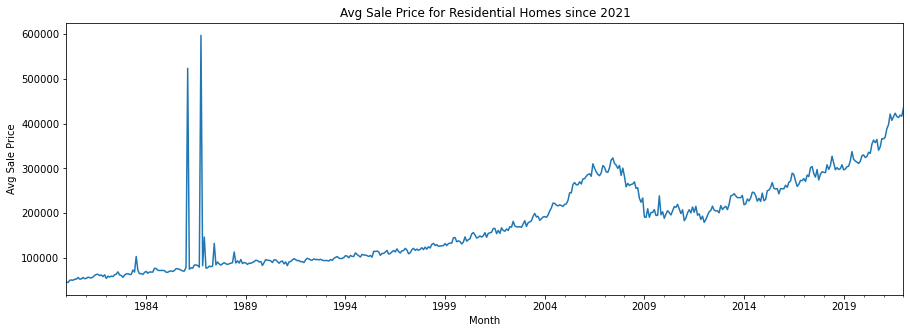

In [16]:
plt.subplots(figsize=(15, 5))
df.groupby(df['S_DATE'].dt.to_period('M'))['S_AMT'].mean().plot()
plt.xlabel('Month')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price for Residential Homes since 2021')
plt.show()

# 5 Home Features<a id='5'></a>
### TB Real Estate is only interested in purchasing investment properties with features that are attractive to most potential home buyers. 

**# of Beds/Baths**: The number of bedrooms and bathrooms are important features for home sales. 
<br>
TB Real Estate Corp is focused on investing in residential homes with 3-5 bedrooms and 1-4 bathrooms.  Anything less or more would not be appealing to most home buyers. 

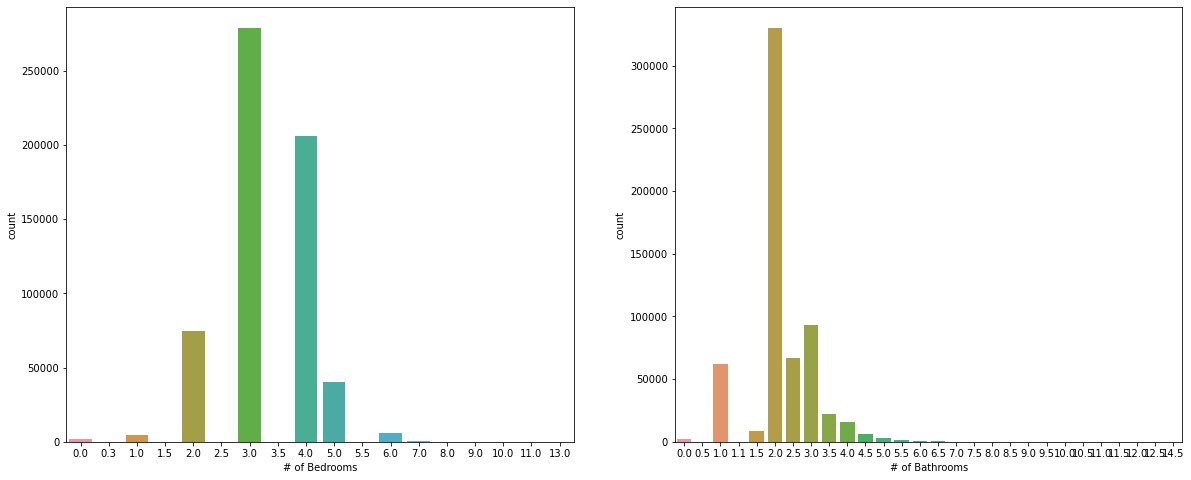

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.countplot(df['tBEDS'], ax=ax1)
sns.countplot(df['tBATHS'],ax=ax2)
ax1.set(xlabel='# of Bedrooms', ylabel='count')
ax2.set(xlabel='# of Bathrooms', ylabel='count')
plt.show()

In [18]:
df = df[(df['tBEDS'] >= 3) & (df['tBEDS'] <= 5)]
df = df[(df['tBATHS'] >= 1) & (df['tBATHS'] <= 4)]

**# of Buildings/Stories/Units**: Most homes have just 1 building structure, 1 unit and 1 or 2 stories.  However, there are a few outliers that have more.  

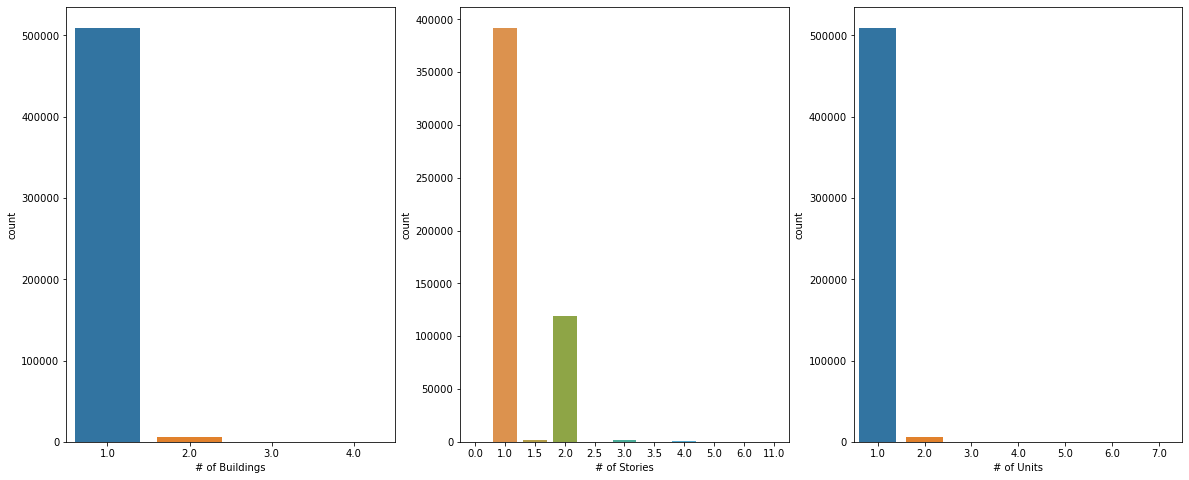

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
sns.countplot(df['tBLDGS'], ax=ax1)
sns.countplot(df['tSTORIES'],ax=ax2)
sns.countplot(df['tUNITS'],ax=ax3)
ax1.set(xlabel='# of Buildings', ylabel='count')
ax2.set(xlabel='# of Stories', ylabel='count')
ax3.set(xlabel='# of Units', ylabel='count')
plt.show()

**Age of Home**: The age of the home may have an impact on the sales price.  Old homes could require more investment in maintenance and repairs than newer homes.  Calculate age of home (AGE) based on Actual Year Built (ACT).  Drop actual year built as well as the original sales date (ORIG_SALES_DATE) and effective year (EFF) which is used to calculate depreciation.  Drop base year (BASE) which is used to calculate property tax based on when the homestead tax exemption was approved.

In [20]:
df['AGE'] = datetime.today().year - df['ACT']
df.drop(['ACT', 'ORIG_SALES_DATE', 'EFF', 'BASE'], axis=1, inplace=True)

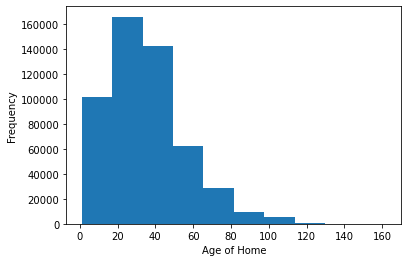

count    515466.000000
mean         34.779438
std          21.057230
min           1.000000
25%          19.000000
50%          33.000000
75%          45.000000
max         162.000000
Name: AGE, dtype: float64

In [21]:
plt.hist(df['AGE'])
plt.xlabel('Age of Home')
plt.ylabel('Frequency')
plt.show()
df['AGE'].describe()

**Heated Area**: The heated area is the square footage of the home that is heated.  This is equivalent to the size of the home and is an important factor in home sales.  Most single family residential homes are between 1500 and 2500 square feet.

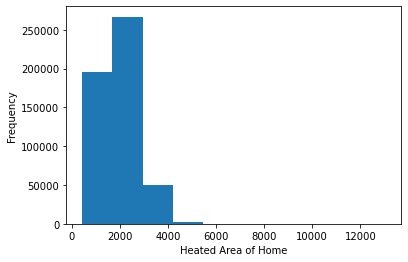

count    515466.000000
mean       2003.289200
std         684.353715
min         420.000000
25%        1495.000000
50%        1868.000000
75%        2389.000000
max       13065.000000
Name: HEAT_AR, dtype: float64

In [22]:
plt.hist(df['HEAT_AR'])
plt.xlabel('Heated Area of Home')
plt.ylabel('Frequency')
plt.show()
df['HEAT_AR'].describe()

**Acreage**: The acreage is the size of the land and is an important factor in home sales.  Most properties are between 0.15 and 0.28 acres.

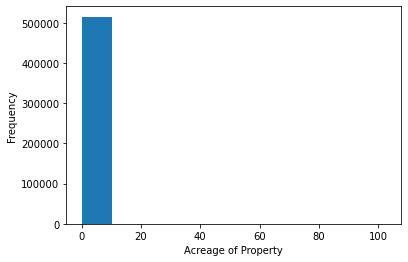

count    515466.000000
mean          0.287918
std           0.577576
min           0.032481
25%           0.147211
50%           0.190396
75%           0.269643
max         102.646000
Name: ACREAGE, dtype: float64

In [23]:
plt.hist(df['ACREAGE'])
plt.xlabel('Acreage of Property')
plt.ylabel('Frequency')
plt.show()
df['ACREAGE'].describe()

# 6 Property Location<a id='6'></a>
## Location, Location, Location!! 
Location is a very important factor when evaluating market value of homes.  The following fields provide information about the location of the property.
- SITE_ADDR - Street Number and Name
- SITE_CITY - City Name
- SITE_ZIP - Postal Zip Code
- MUNICIPALITY_CD - "A"=Tampa, "T"=Temple Terrace, "P"=Plant City, "U"=Unincorporated
- TOWNSHIP_CD - Values 27-32 indicating the latitudinal rows on the grid map below.
- RANGE_CD - Values 17-22 indicating the longitudinal columns on the grid map below.
- SECTION_CD - Values 1-36 represented by the 6x6 sections of red squares within each Township/Range on the grid map below.
- LAND_TYPE_ID - Identifies the type of land. All platted Subdivisions have been assigned an ID number. For all unplatted, "ZZZ" has been assigned. 
- BLOCK_NUM - 6 digit code for the Block Number in platted Subdivisions. For unplatted land, the BLOCK# will carry a uniquely assigned number.
- LOT_NUM - 6 digit code for the Lot Numbers in Platted Subdivisions. For all unplatted land, the LOT# will carry a uniquely assigned number. 
- NBHC - 6 digit code for the Neighborhood as displayed in the colored areas on the grid map below.
- Market Area - Values 1-29 for the Market Area used for assessing values for tax purposes.  The Market Area is represented by the bold black division lines and large purple numbers in the grid map below.

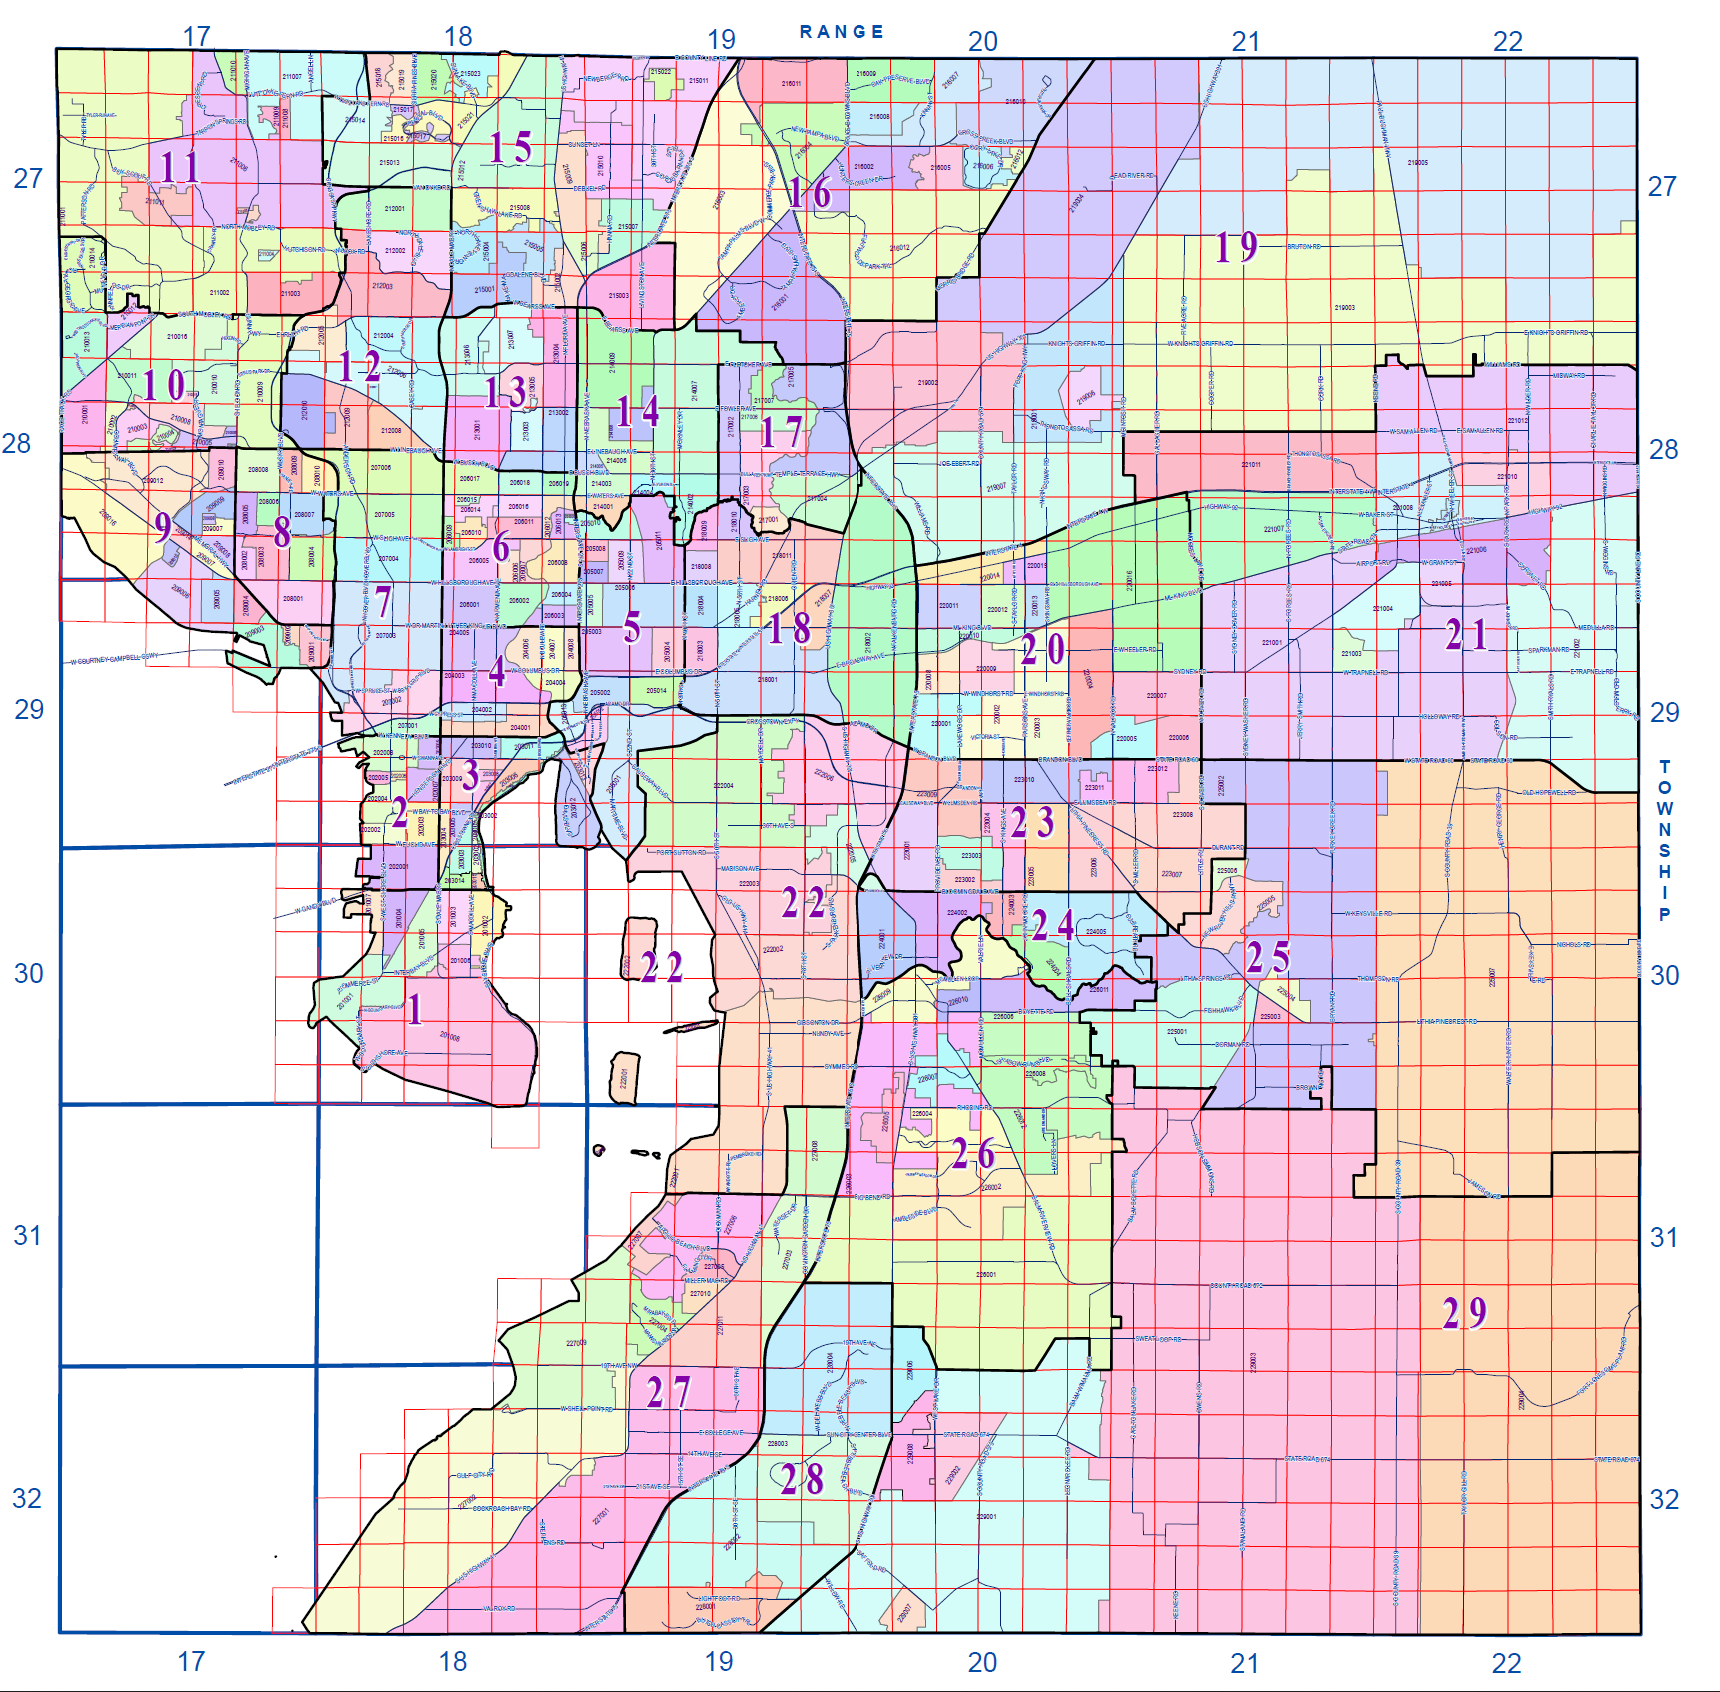

**Property Address** data includes the street name (SITE_ADDR), city name (SITE_CITY), and postal zip code (SITE_ZIP).  Of these, the 5-digit zip code could potential provide some correlation to the sales price as market values vary in different areas of the county.  The 5-digit zip code is extracted and the other property address fields will be dropped.

In [24]:
df['ZIP5'] = df['SITE_ZIP'].astype(str).str[:5].astype(int)
df.drop(['SITE_ZIP', 'SITE_ADDR', 'SITE_CITY'], axis=1, inplace=True)

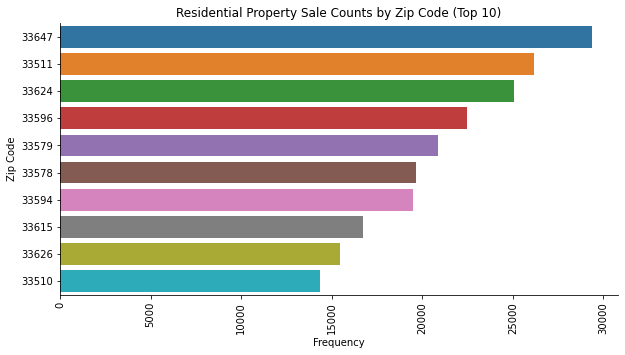

count     515466
unique        80
top        33647
freq       29344
Name: ZIP5, dtype: object

In [25]:
plt.subplots(figsize=(10, 5))
sns.countplot(y="ZIP5", data=df, order=df.ZIP5.value_counts().iloc[:10].index)
plt.ylabel('Zip Code')
plt.xlabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Zip Code (Top 10)')
sns.despine()
plt.show()
df['ZIP5'].astype(str).describe()

**Municipality Code** identifies if the property is located in one of Hillsborough County's three cities (Tampa, Temple Terrace, Plant City) or in an unincorporated township.  Properties with similar characteristics would likely have higher market values in the city.  The Municipality Code will be converted to numeric values.  Also, special tax-related district information is included in Special District 1 & 2 (SD1, SD2) as well as Tax Increment Fund (TIF).  These can be dropped.

In [26]:
df["CITY_CD"] = df["MUNICIPALITY_CD"].map({"A": 0, "T": 1, "P": 2, "U":3})
df.drop(['MUNICIPALITY_CD', 'SD1', 'SD2', 'TIF'], axis=1, inplace=True)

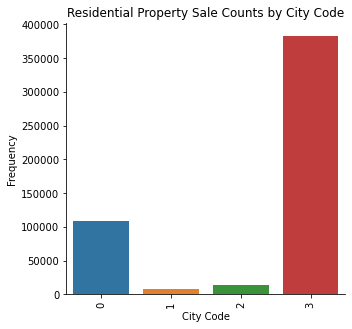

In [27]:
plt.subplots(figsize=(5, 5))
sns.countplot(x=df['CITY_CD'])
plt.xlabel('City Code')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by City Code')
sns.despine()
plt.show()

**Township Code and Range Code** are used to describe the coordinates of 36 square sections of Hillsborough County.  These coordinates can be calculated into a single value representing each of the 36 square sections.

In [28]:
df['TOWNSHIP_RANGE'] = (df['RANGE_CD'] - 16) + ((df['TOWNSHIP_CD']-27)*6)
df.drop(['RANGE_CD', 'TOWNSHIP_CD'], axis=1, inplace=True)

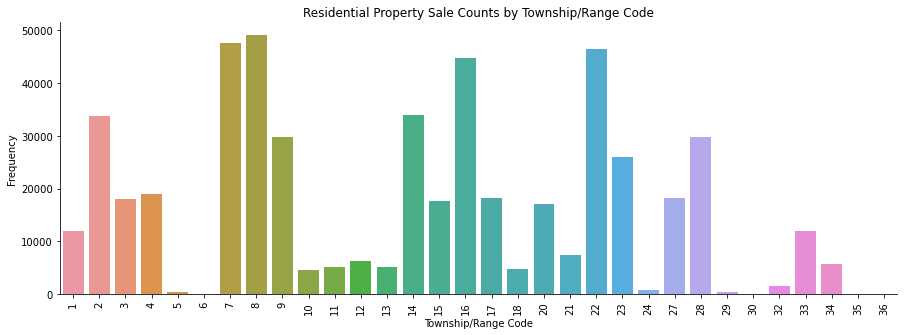

In [29]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=df['TOWNSHIP_RANGE'])
plt.xlabel('Township/Range Code')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Township/Range Code')
sns.despine()
plt.show()

**Section Code** is used to describe the 36 square sections of each Township/Range in Hillsborough County.  The Section Code divides Hillsborough County into 1296 square sections.  The Section Codes contain values of 1-36 which can be combined with the Township/Range Code to calculate a single value representing each of the 1296 square sections.

In [30]:
df['SECTION_CD'] = df['SECTION_CD'] * df['TOWNSHIP_RANGE']

count    515466.000000
mean        242.473333
std         205.017069
min           1.000000
25%          72.000000
50%         189.000000
75%         360.000000
max        1188.000000
Name: SECTION_CD, dtype: float64

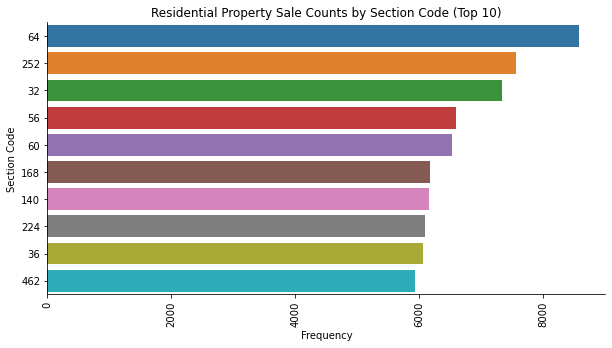

count     515466
unique       342
top           64
freq        8575
Name: SECTION_CD, dtype: object

In [58]:
plt.subplots(figsize=(10, 5))
sns.countplot(y="SECTION_CD", data=df, order=df.SECTION_CD.value_counts().iloc[:10].index)
plt.ylabel('Section Code')
plt.xlabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Section Code (Top 10)')
sns.despine()
plt.show()
df['SECTION_CD'].astype(str).describe()

**Market Area** is used to describe 29 areas of Hillsborough County and is used by the County Property Appraiser to assess values for tax purposes.  Market Areas are not related to Township/Range Codes as there is a many-to-many relationship between them.  Market Areas are made up of one-to-many Neighborhood Codes.  The Market Area Code can be extracted from the second and third digits of the Neighborhood Code.

In [31]:
df['MARKET_AREA_CD'] = df['NBHC'].astype(str).str[1:3].astype(int)

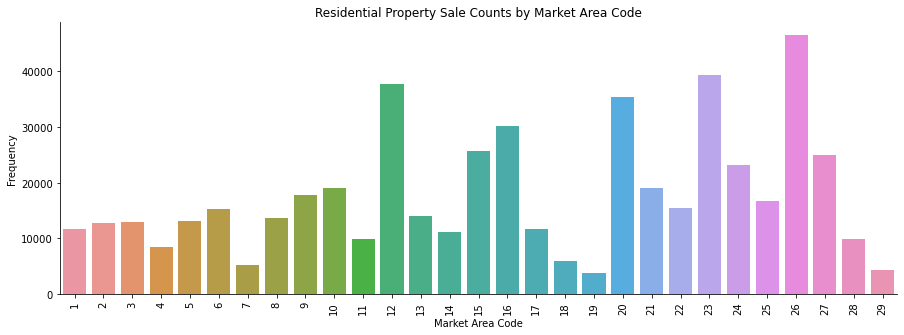

In [32]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=df['MARKET_AREA_CD'])
plt.xlabel('Market Area Code')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Market Area Code')
sns.despine()
plt.show()

**Neighborhood Code** is used to describe 307 areas of Hillsborough County and is used by the County Property Appraiser to assess values for tax purposes. 

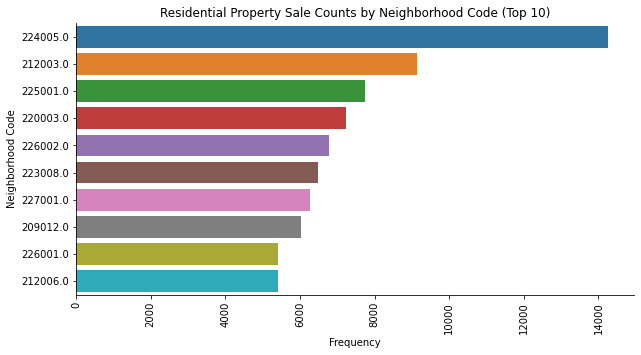

count       515466
unique         312
top       224005.0
freq         14243
Name: NBHC, dtype: object


In [33]:
plt.subplots(figsize=(10, 5))
sns.countplot(y="NBHC", data=df, order=df.NBHC.value_counts().iloc[:10].index)
plt.ylabel('Neighborhood Code')
plt.xlabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Residential Property Sale Counts by Neighborhood Code (Top 10)')
sns.despine()
plt.show()
print(df['NBHC'].astype(str).describe())

In [34]:
df['LAND_TYPE_ID'].describe()

count     515466
unique      6654
top          ZZZ
freq       18348
Name: LAND_TYPE_ID, dtype: object

The **SITE_ADDR** is the unique house number and street name for the property in the city.  The **BLOCK_NUM** and **LOT_NUM** are numeric representations of the street address.
<br>
The **SITE_CITY** is the city or town where the property is located.  
Therefore the SITE_ADDR and SITE_CITY can be dropped.

## Correlation

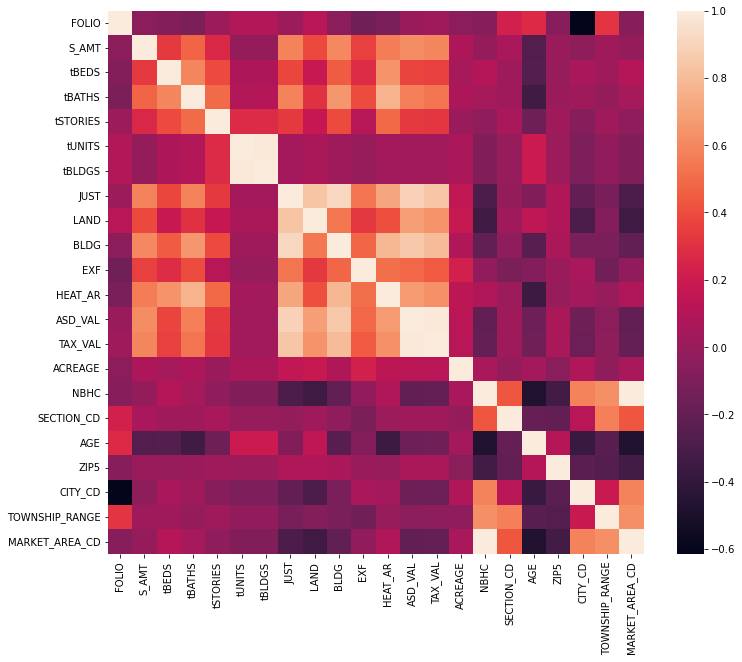

In [48]:
plt.subplots(figsize=(12,10))
# sns.heatmap(df[df['MARKET_AREA_CD'] == 26].corr());
sns.heatmap(df.corr());

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515466 entries, 0 to 847100
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   FOLIO            515466 non-null  int64         
 1   S_DATE           515466 non-null  datetime64[ns]
 2   REA_CD           515466 non-null  object        
 3   S_AMT            515466 non-null  float64       
 4   S_TYPE           515466 non-null  object        
 5   ORIG_SALES_DATE  515466 non-null  object        
 6   tBEDS            515466 non-null  float64       
 7   tBATHS           515466 non-null  float64       
 8   tSTORIES         515466 non-null  float64       
 9   tUNITS           515466 non-null  float64       
 10  tBLDGS           515466 non-null  float64       
 11  JUST             515466 non-null  float64       
 12  LAND             515466 non-null  float64       
 13  BLDG             515466 non-null  float64       
 14  EXF              515

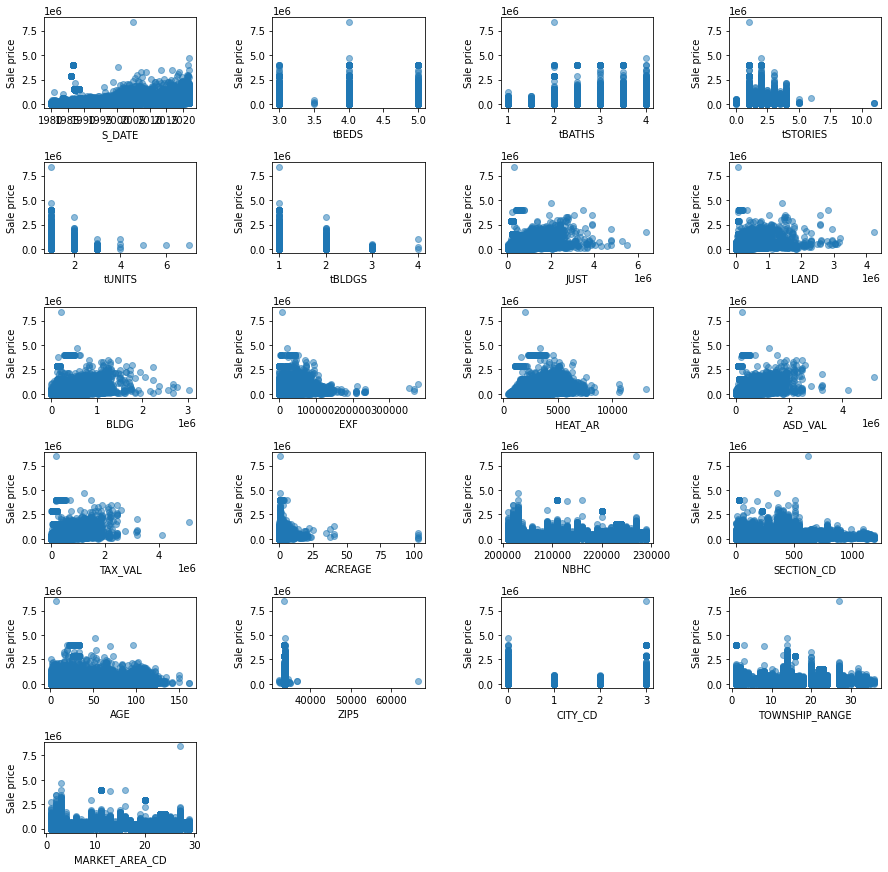

In [51]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'S_AMT', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sale price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
features = [c for c in df.columns if c not in ['FOLIO', 'S_AMT', 'REA_CD', 'S_TYPE', 'ORIG_SALES_DATE', 'SD1', 'SD2', 'TIF', 'LAND_TYPE_ID', 'BLOCK_NUM', 'LOT_NUM']]
scatterplots(features, ncol=4, figsize=(15, 15))

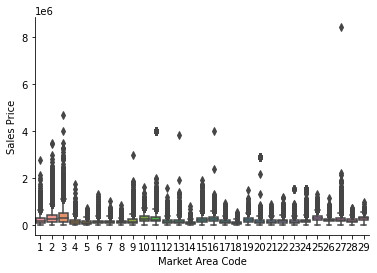

In [38]:
sns.boxplot(data=df,
            x='MARKET_AREA_CD',
            y='S_AMT')
plt.xlabel('Market Area Code')
plt.ylabel('Sales Price')
sns.despine()
# plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

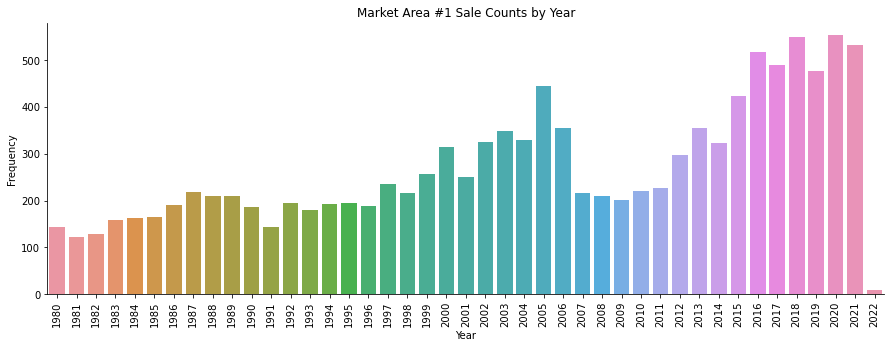

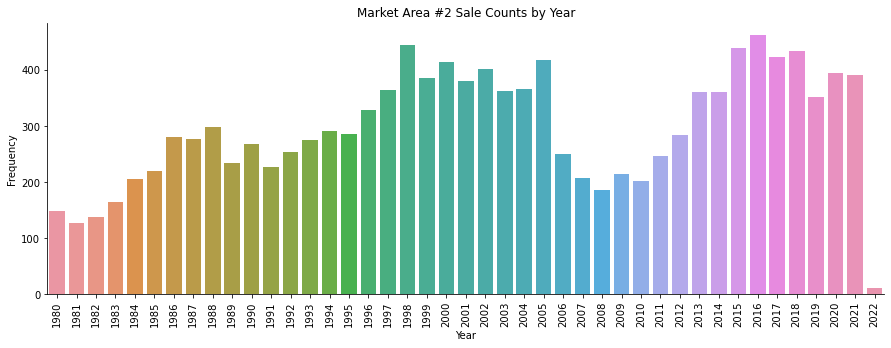

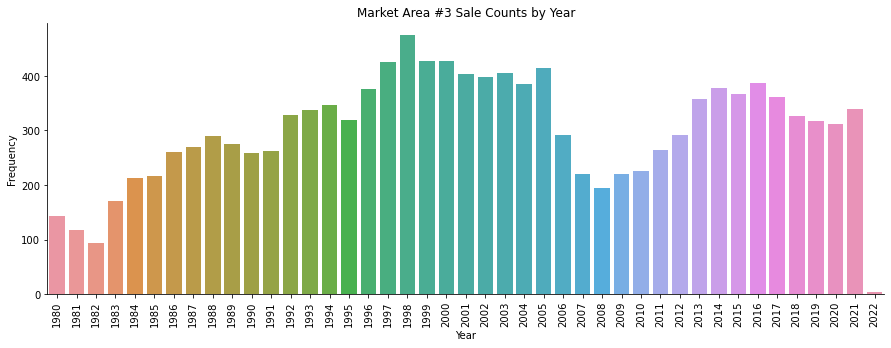

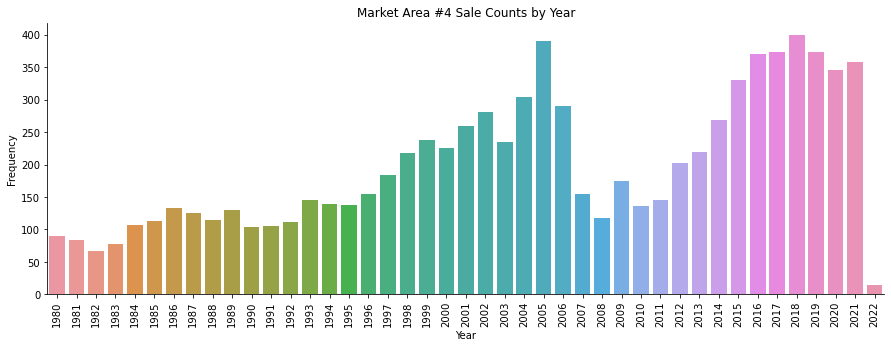

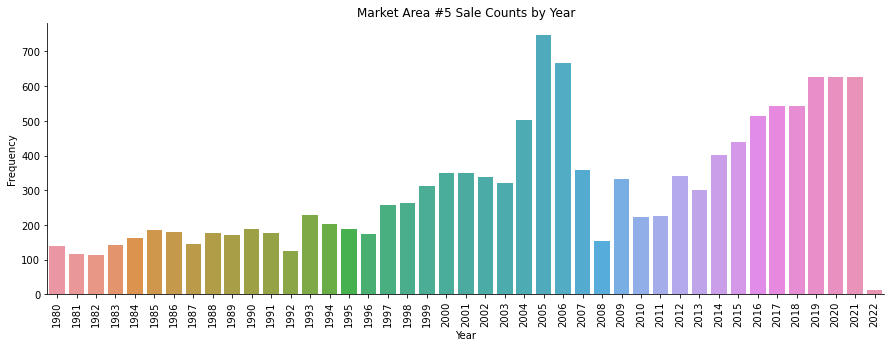

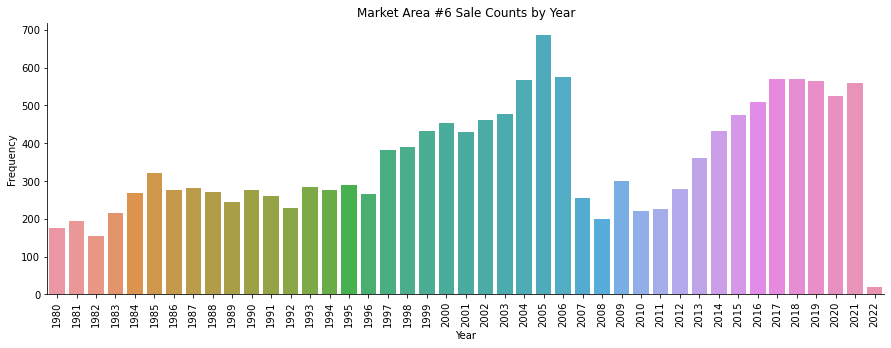

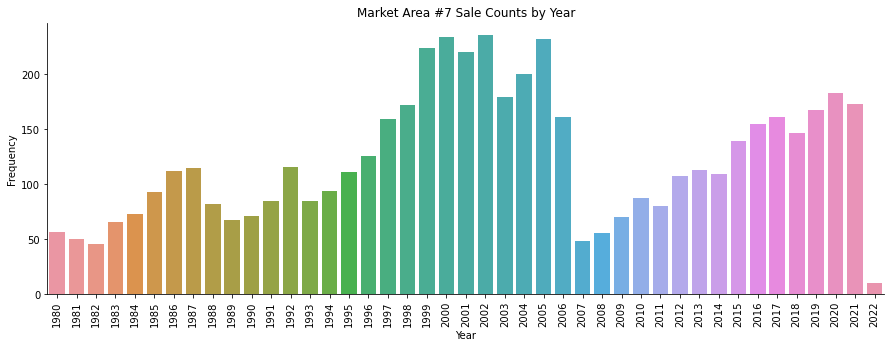

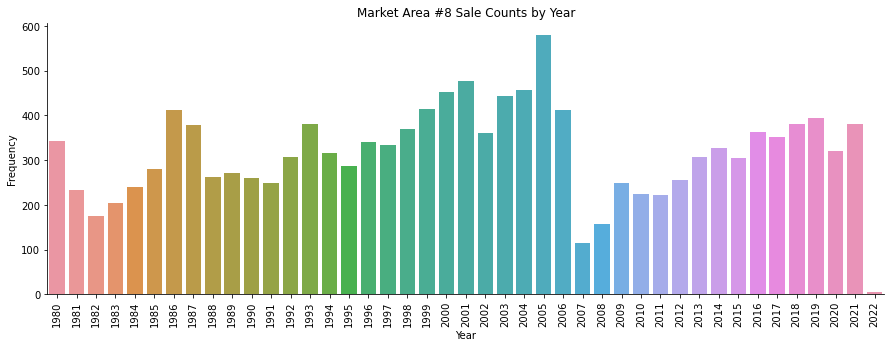

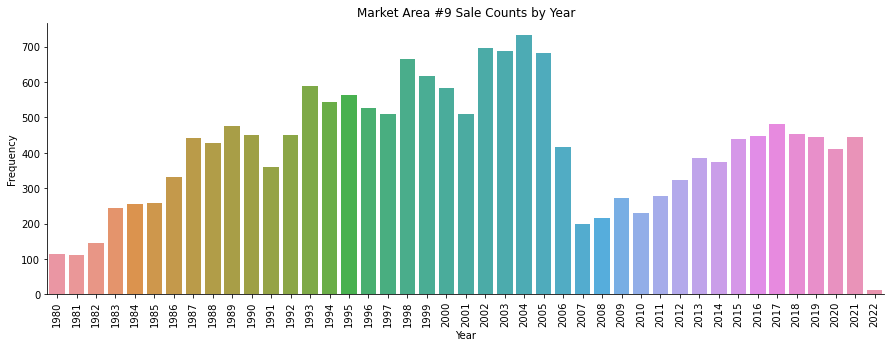

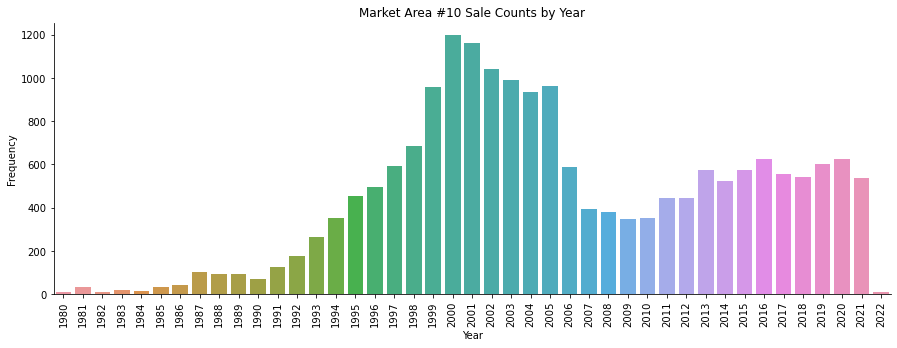

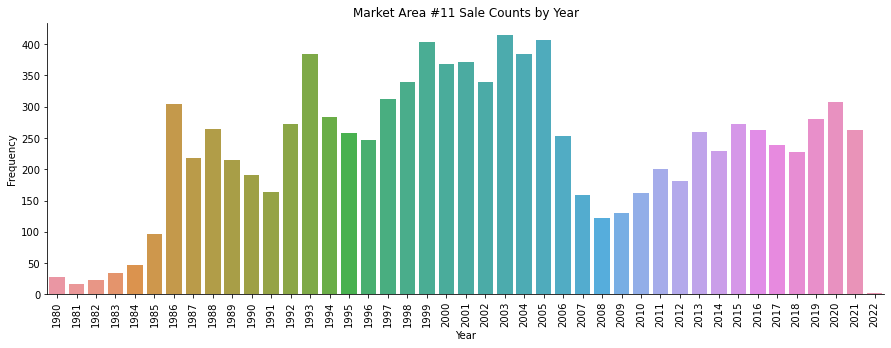

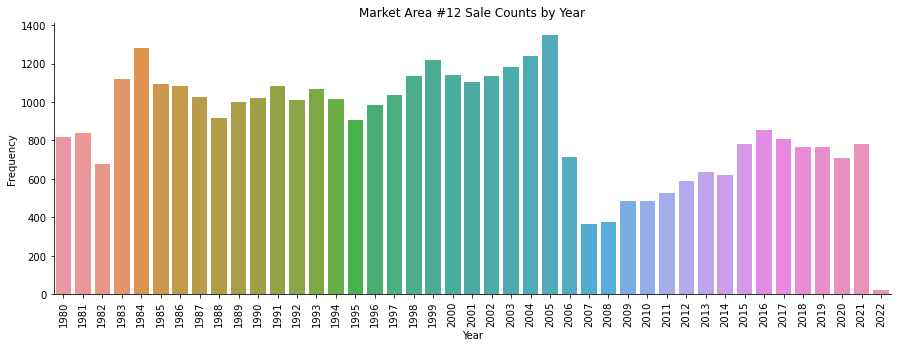

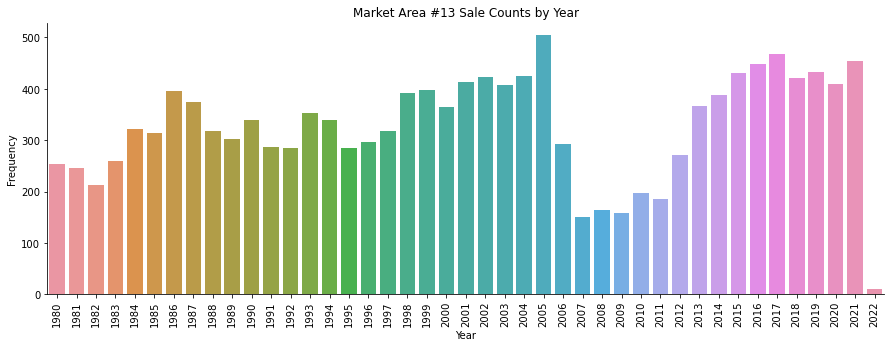

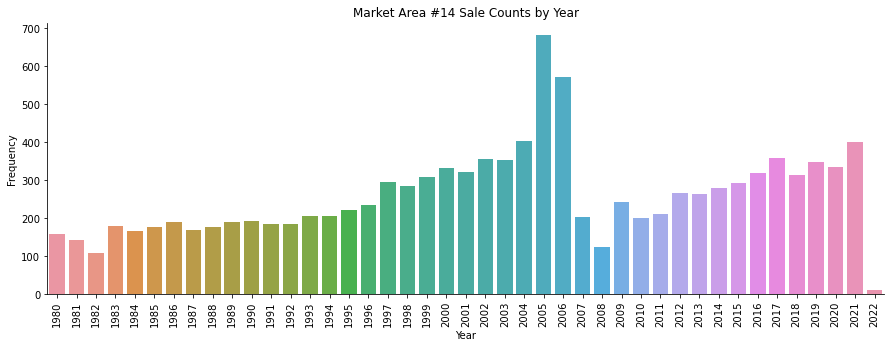

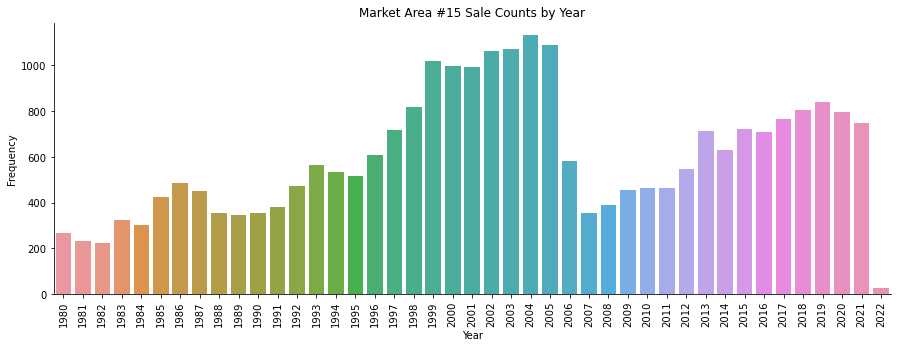

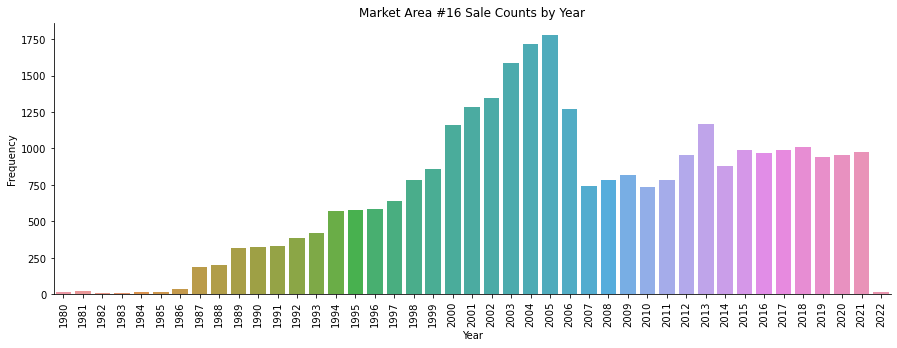

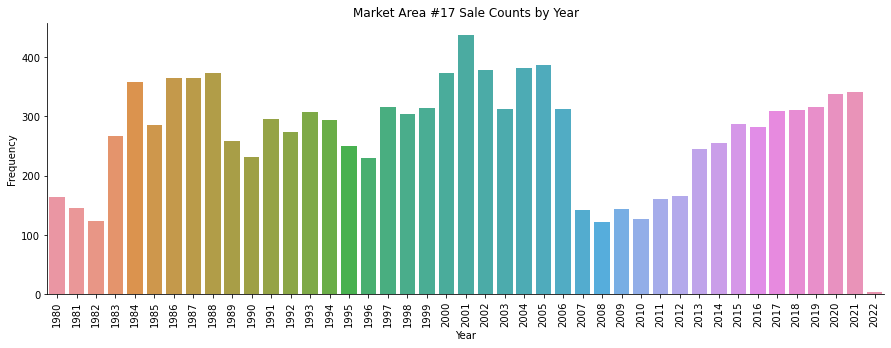

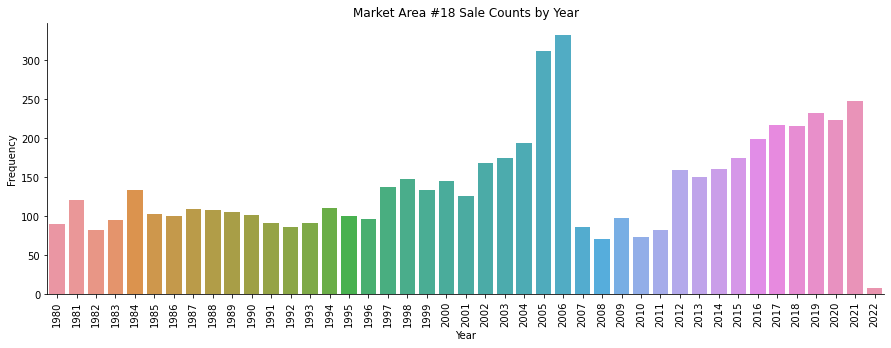

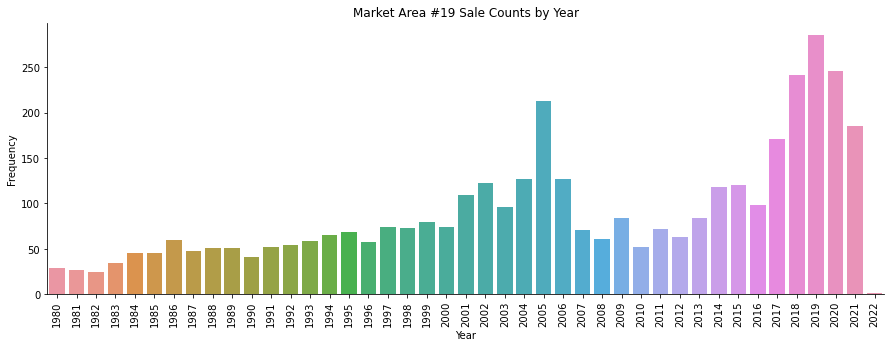

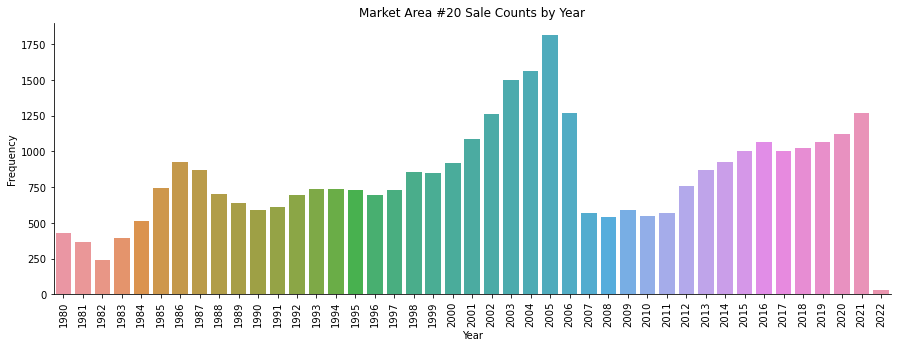

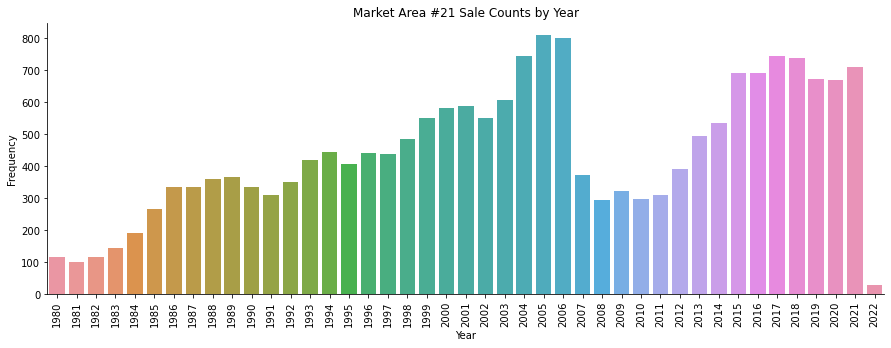

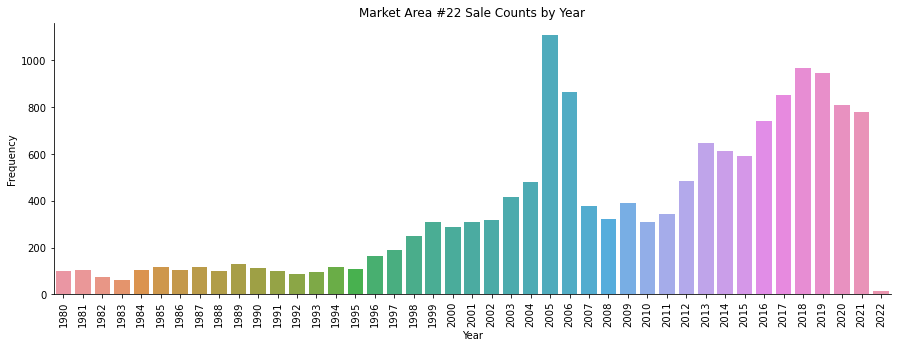

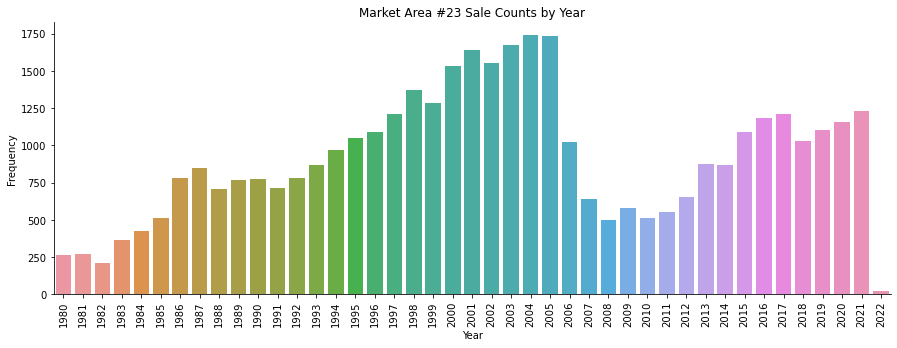

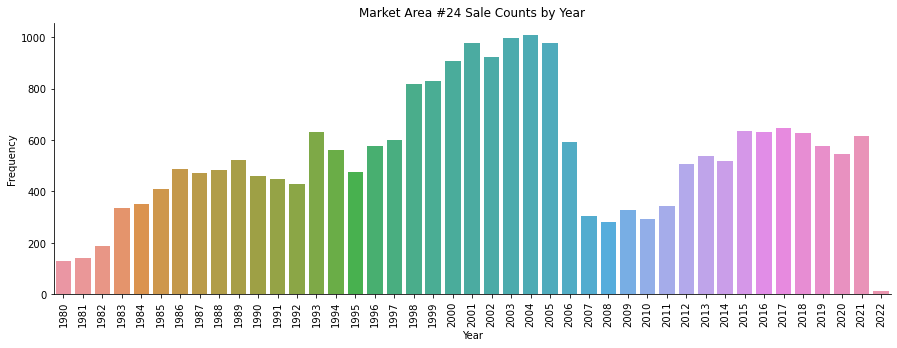

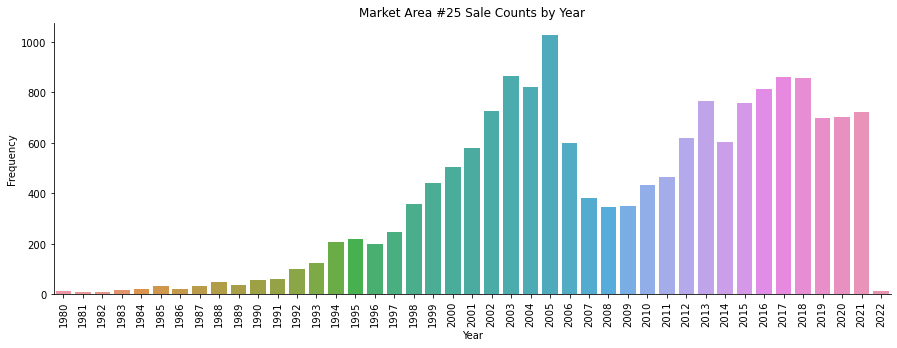

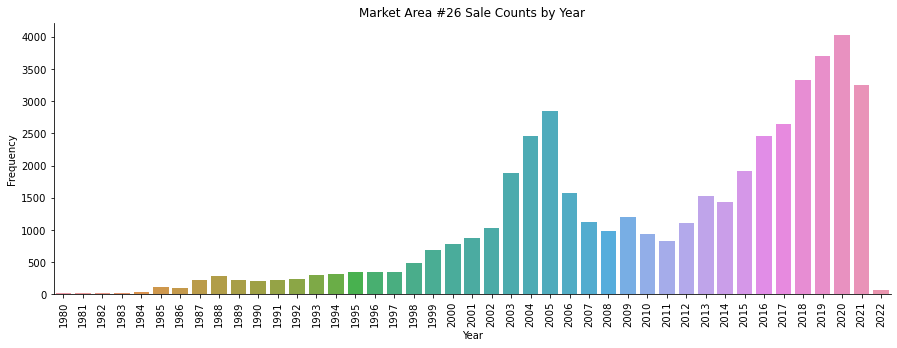

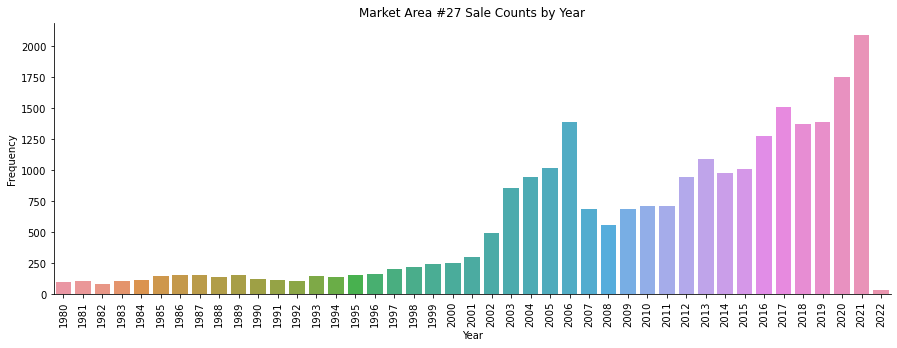

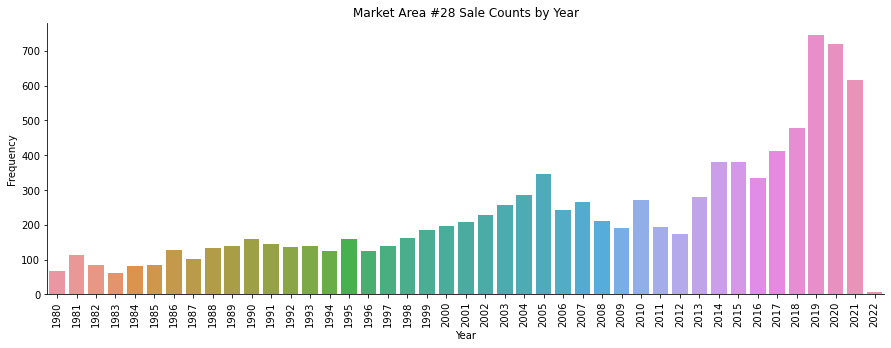

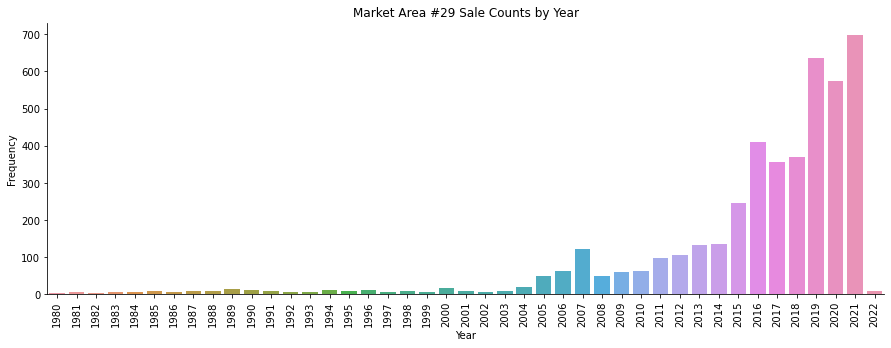

In [47]:
for i in range(29):
    plt.subplots(figsize=(15, 5), sharey=True)
    sns.countplot(x=df[df['MARKET_AREA_CD']==i+1]['S_DATE'].dt.year)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.xticks(rotation = 90)
    plt.title('Market Area #' + str(i+1) + ' Sale Counts by Year')
    sns.despine()
    plt.show()

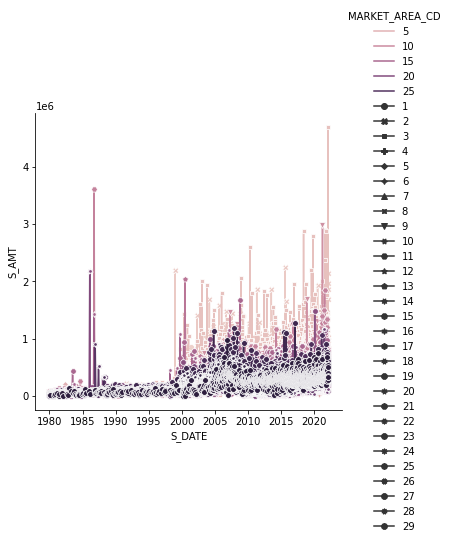

In [43]:
# Add markers and make each line have the same style
sns.relplot(x="S_DATE", y="S_AMT", 
            data=df, kind="line", 
            ci=None, style="MARKET_AREA_CD", 
            hue="MARKET_AREA_CD",
            markers=True,
            dashes=False)

# Show plot
plt.show()

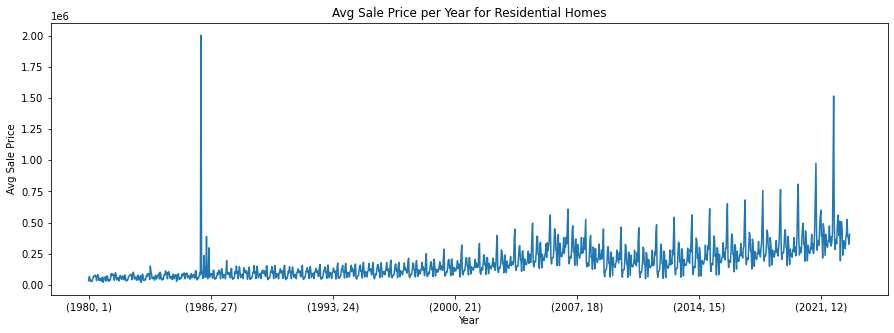

In [46]:
plt.subplots(figsize=(15, 5))
df.groupby([df['S_DATE'].dt.year, df['MARKET_AREA_CD']])['S_AMT'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Avg Sale Price')
plt.title('Avg Sale Price per Year for Residential Homes')
plt.show()